# Test runs
Below follows some test runs of my implementations on basic problems.

### ```SGD``` class on basic first-degree polynomial line-fitting problem

In [1]:
n = 100
np.random.seed(0)
x = np.random.rand(n,1)
y = 4 + 2*x + .05*np.random.rand(n,1)
X = np.c_[np.ones(n), x]

In [2]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
print('ols-inversion:\n', beta)

ols-inversion:
 [[4.027904  ]
 [1.99682755]]


In [3]:
from StochasticGradientDescent import SGD

sgd = SGD(epochs=10, batches=5, learning_schedule='optimal', cost_function='ols')
beta = sgd.run(X, y)
print('ols-sgd:\n', beta)

sgd = SGD(epochs=20, batches=10, learning_schedule='optimal', cost_function='ridge')
beta = sgd.run(X, y, lmd=.1)
print('ridge-sgd:\n', beta)

ols-sgd:
 [[3.99789401]
 [1.97782246]]
ridge-sgd:
 [[3.72007746]
 [1.86825833]]


### `SGD` class together with implementations of OLS and Ridge in `ols.py` and `ridge.py` 

In [4]:
import ols, ridge
from utils import *

n = 100
x, y = randmesh(sn=n)
z = 1. + 2.*x + 3.*y + 4.*x*x + 5*x*y + 6*y*y + .03*np.random.rand(n,1)
X = make_design_matrix(x, y, pn=2)

In [5]:
# Direct inversion
beta = np.linalg.inv(X.T @ X) @ X.T @ z
print('ols-inversion:\n', beta)

ols-inversion:
 [[1.02429934]
 [1.98277384]
 [2.97928365]
 [4.00860255]
 [5.01623802]
 [6.00975532]]


In [6]:
# Regular OLS
sgd = SGD(epochs=50, batches=40, learning_schedule='constant', eta0=.5, cost_function='ols')
df = ols.run_ols_kfold(X, z, sgd, k=5, polynomial_orders=[2])
print('ols-sgd:\n', sgd.beta)
df

ols-sgd:
 [[1.07049348]
 [2.10085946]
 [2.90572522]
 [3.96732253]
 [4.93328259]
 [6.12359383]]


,pol_order,train_mse,test_mse
2,2.0,0.002434,0.002483


In [7]:
# Ridge
sgd = SGD(epochs=100, batches=40, learning_schedule='invscaling', eta0=.5, cost_function='ridge')
ridge.run_ridge_kfold(X, z, sgd, k=5, polynomial_orders=[2], lambdas=[0.003594])
print('ridge-sgd:\n', sgd.beta)
df = ridge.run_ridge_kfold(X, z, sgd, k=5, polynomial_orders=[2], lambdas=np.logspace(-3,-2,10))
df

ridge-sgd:
 [[8.43104528]
 [0.47606812]
 [0.64298641]
 [1.24295542]
 [1.0490371 ]
 [1.9085351 ]]


,lambda,train_mse_2,test_mse_2
0,0.001000,0.003379,0.004296
1,0.001292,0.003106,0.003967
2,0.001668,0.002809,0.003607
3,0.002154,0.002515,0.003240
4,0.002783,0.002271,0.002917
5,0.003594,0.002161,0.002725
6,0.004642,0.002320,0.002807
7,0.005995,0.002960,0.003382
8,0.007743,0.004397,0.004777
9,0.010000,0.007102,0.007470


In [8]:
from FeedForwardNeuralNetwork import Layer, FFNN
l1 = Layer(3, 4)
l2 = Layer(2, 3)
l3 = Layer(1, 2)
data_set = np.random.rand(5,4)
out = l1.feed_forward(data_set)
out

array([[0.74473969, 0.82651211, 0.81383602],
       [0.78663831, 0.86572883, 0.87880888],
       [0.79186047, 0.8849014 , 0.8659692 ],
       [0.60457609, 0.68459139, 0.63852002],
       [0.8383198 , 0.91986642, 0.91733748]])

In [9]:
out = l2.feed_forward(out)
out

array([[0.77931861, 0.82033729],
       [0.79180812, 0.83367971],
       [0.79328506, 0.83449461],
       [0.73593727, 0.77343768],
       [0.80426663, 0.84596264]])

In [10]:
out = l3.feed_forward(out)
out

array([[0.73582821],
       [0.73900315],
       [0.73927181],
       [0.72453045],
       [0.74200502]])

In [12]:
ffnn = FFNN(4)
t = np.random.rand(5).reshape((5,1))
cost_derivatives = ffnn._mse_derivative(out, t)
cost_derivatives

array([[-0.41768141],
       [ 0.43430966],
       [ 0.64921974],
       [ 0.91994969],
       [-0.06445734]])

In [14]:
(d,w) = l3.back_propagate(cost_derivatives)
(d,w)

(array([[-0.08119102],
        [ 0.08376856],
        [ 0.12513646],
        [ 0.18360915],
        [-0.0123393 ]]),
 array([[0.5488135 ],
        [0.71518937]]))

In [15]:
cost_derivatives = d @ w.T
(d,w) = l2.back_propagate(cost_derivatives)
(d,w)

(array([[-0.00766326, -0.00855814],
        [ 0.00757861,  0.00830704],
        [ 0.01126185,  0.01236063],
        [ 0.01958245,  0.02301062],
        [-0.00106606, -0.00114998]]),
 array([[0.5488135 , 0.71518937],
        [0.60276338, 0.54488318],
        [0.4236548 , 0.64589411]]))

In [16]:
cost_derivatives = d @ w.T
(d,w) = l1.back_propagate(cost_derivatives)
(d,w)

(array([[-1.96307282e-03, -1.33099035e-03, -1.32935685e-03],
        [ 1.69522798e-03,  1.05716411e-03,  9.13396646e-04],
        [ 2.47569786e-03,  1.37736359e-03,  1.48040499e-03],
        [ 6.50350828e-03,  5.25600299e-03,  5.34529311e-03],
        [-1.90774427e-04, -9.35542123e-05, -9.05708797e-05]]),
 array([[0.5488135 , 0.71518937, 0.60276338],
        [0.54488318, 0.4236548 , 0.64589411],
        [0.43758721, 0.891773  , 0.96366276],
        [0.38344152, 0.79172504, 0.52889492]]))

In [17]:
eta = .1
w = l1.update_weights(eta, data_set)
b = l1.update_biases(eta)
(w,b)

(array([[0.54863029, 0.71508423, 0.60265541],
        [0.54466797, 0.42352254, 0.6457681 ],
        [0.4373719 , 0.8916478 , 0.96354502],
        [0.38274791, 0.79121283, 0.52837091]]),
 array([0.00914794, 0.0093734 , 0.00936808]))

In [18]:
w = l2.update_weights(eta, l1.outputs)
b = l2.update_biases(eta)
(w,b)

(array([[0.54680173, 0.71289971],
        [0.60050155, 0.54230806],
        [0.42148462, 0.6434264 ]]),
 array([0.00703064, 0.00660298]))

In [19]:
w = l3.update_weights(eta, l2.outputs)
b = l3.update_biases(eta)
(w,b)

(array([[0.52606105],
        [0.69126642]]),
 array([-0.01989838]))

In [837]:
n = 100
np.random.seed(0)
x = np.random.rand(n,1)*n
y = 4 + 2*x + .03*np.random.rand(n,1)
X = np.c_[np.ones(n), x]
y = y / y.max()
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(X, y, train_size=.5)

0.7179838730469952 0.7435073648046098


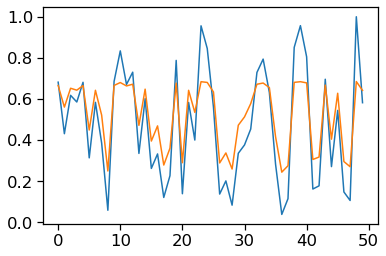

In [838]:
ffnn = FFNN(2)
ffnn.add_layer(2)
ffnn.add_layer(1)
ffnn.train(X_train, y_train, epochs=500, batches=10, eta0=.01)
out = ffnn.predict(X_train)
r2_train = r2(y_train, out)
out = ffnn.predict(X_test)
r2_test = r2(y_test, out)
print(r2_train, r2_test)
plt.plot(list(range(y_test.shape[0])), y_test)
plt.plot(list(range(y_test.shape[0])), out)

In [965]:
n = 250
x, y = randmesh(sn=n, random_state=1)
z,_,_ = franke_sampler(x, y, var_eps=.03)
X = make_design_matrix(x, y, pn=10)
z = z + np.abs(z.min())
z = z/z.max()
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(X, z, train_size=.7)
X_train, X_test = scale(X_train, X_test)

0.6084343132923368 0.5900102353872531


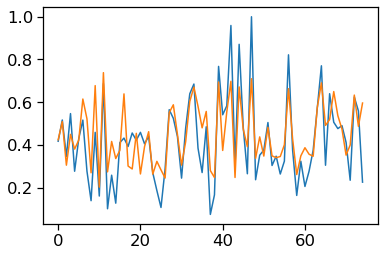

In [966]:
n, p = X_train.shape
ffnn = FFNN(p)
ffnn.add_layer(p)
ffnn.add_layer(1)

ffnn.train(X_train, y_train, epochs=250, batches=50, learning_schedule='invscaling', eta0=40, lmd=.001)
out = ffnn.predict(X_train)
r2_train = r2(y_train, out)

out = ffnn.predict(X_test)
r2_test = r2(y_test, out)

print(r2_train, r2_test)

plt.plot(list(range(y_test.shape[0])), y_test)
plt.plot(list(range(y_test.shape[0])), out)

In [963]:
n = 1000
x, y = randmesh(sn=n, random_state=1)
z,_,_ = franke_sampler(x, y, var_eps=.03)
X = make_design_matrix(x, y, pn=5)

z = z + np.abs(z.min())
z = z/z.max()
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(X, z, train_size=.7)
X_train, X_test = scale(X_train, X_test)

0.7169523406530103 0.6880898670910237


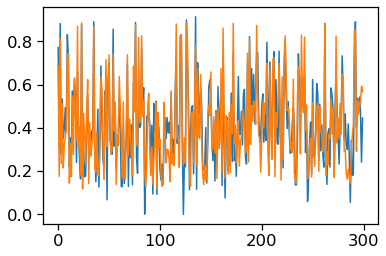

In [964]:
n, p = X_train.shape
ffnn = FFNN(p)
ffnn.add_layer(p, activation_function='sigmoid')
ffnn.add_layer(1, activation_function='sigmoid')

ffnn.train(X_train, y_train, epochs=1000, batches=50, learning_schedule='constant', eta0=.5, lmd=.0)
out = ffnn.predict(X_train)
r2_train = r2(y_train, out)

out = ffnn.predict(X_test)
r2_test = r2(y_test, out)

print(r2_train, r2_test)

plt.plot(list(range(y_test.shape[0])), y_test)
plt.plot(list(range(y_test.shape[0])), out)

X = (n_inputs, n_features) = (1797, 8, 8)


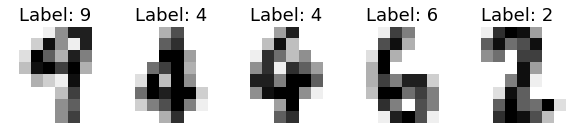

In [1256]:
digits = skl.datasets.load_digits()
images = digits.images
targets = digits.target

n_images = len(images)
print("X = (n_inputs, n_features) = " + str(images.shape))

# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

plt.figure(figsize=(10,25))
for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

In [1257]:
X = images.reshape(n_inputs, -1)
n, p = X.shape

y = np.zeros((n,10))
for i in range(n):
    y[i, targets[i]] = 1

X_train, X_test, y_train, _, _, true = skl.model_selection.train_test_split(
    *skl.utils.resample(X, y, targets, replace=False, random_state=0), train_size=.8)

In [1258]:
ffnn = FFNN(p, cost_function='cross-entropy')
ffnn.add_layer(50, activation_function='sigmoid')
ffnn.add_layer(10, activation_function='softmax')

k = 10
acc = np.zeros((k,k))
etas = np.logspace(-4,-2,k)
lambdas = np.logspace(-1,2,k)
for i, eta in enumerate(etas):
    for j, lmd in enumerate(lambdas):
        ffnn.train(X_train, y_train, epochs=100, batches=14, learning_schedule='constant', eta0=eta, lmd=lmd)
        out = ffnn.predict(X_test)
        pred = out.argmax(axis=1)
        acc[i,j] = skl.metrics.accuracy_score(true, pred)
        ffnn.reset()



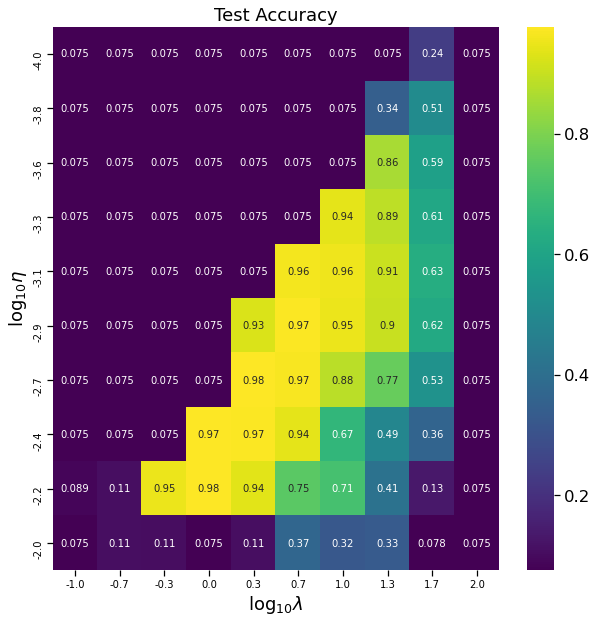

In [1259]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(acc, annot=True, ax=ax, cmap="viridis")
ax.set_yticklabels([fr'{np.log10(eta):.1f}' for eta in etas], fontsize=10)
ax.set_xticklabels([fr'{np.log10(lmd):.1f}' for lmd in lambdas], fontsize=10)
ax.set_title("Test Accuracy")
ax.set_ylabel("log$_{10}\eta$")
ax.set_xlabel("log$_{10}\lambda$")
plt.show()

In [1392]:
data, targets = skl.datasets.load_breast_cancer(return_X_y=True)
X = data
n, p = X.shape
y = targets.reshape(n,1)

X_train, X_test, y_train, y_test, _, true = skl.model_selection.train_test_split(
    *skl.utils.resample(X, y, targets, replace=False, random_state=5), train_size=.7)

In [1395]:
ffnn = FFNN(p, cost_function='cross-entropy')
#ffnn.add_layer(20, activation_function='sigmoid')
ffnn.add_layer(1, activation_function='unit-step')

k = 10
acc = np.zeros((k,k))
etas = np.logspace(-2,1,k)
lambdas = np.logspace(-2,1,k)
for i, eta in enumerate(etas):
    for j, lmd in enumerate(lambdas):
        ffnn.train(X_train, y_train, epochs=100, batches=4, learning_schedule='geron', eta0=eta, lmd=lmd)
        out = ffnn.predict(X_test)
        pred = out
        acc[i,j] = skl.metrics.accuracy_score(true, pred)
        ffnn.reset()

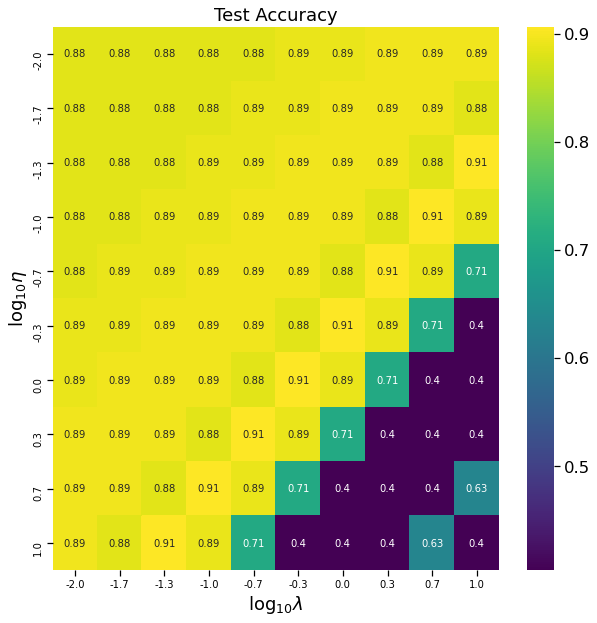

In [1396]:
fig, ax = plt.subplots(figsize = (k, k))
sns.heatmap(acc, annot=True, ax=ax, cmap="viridis")
ax.set_yticklabels([fr'{np.log10(eta):.1f}' for eta in etas], fontsize=10)
ax.set_xticklabels([fr'{np.log10(lmd):.1f}' for lmd in lambdas], fontsize=10)
ax.set_title("Test Accuracy")
ax.set_ylabel("log$_{10}\eta$")
ax.set_xlabel("log$_{10}\lambda$")
plt.show()

In [1450]:
df = pd.read_csv('data_banknote_authentication.txt', header=None)
X = df[[0,1,2,3]].to_numpy()
y = df[4].to_numpy()
n, p = X.shape
y = y.reshape(n, 1)
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(
    *skl.utils.resample(X, y, replace=False, random_state=0), train_size=.7)

In [1457]:
ffnn = FFNN(p, cost_function='cross-entropy')
ffnn.add_layer(2, activation_function='sigmoid')
ffnn.add_layer(1, activation_function='unit-step')

k = 10
acc = np.zeros((k,k))
etas = np.logspace(-5,1,k)
lambdas = np.logspace(-5,1,k)
for i, eta in enumerate(etas):
    for j, lmd in enumerate(lambdas):
        ffnn.train(X_train, y_train, epochs=100, batch_size=50, learning_schedule='geron', eta0=eta, lmd=lmd)
        out = ffnn.predict(X_test)
        pred = out
        acc[i,j] = skl.metrics.accuracy_score(y_test, pred)
        ffnn.reset()

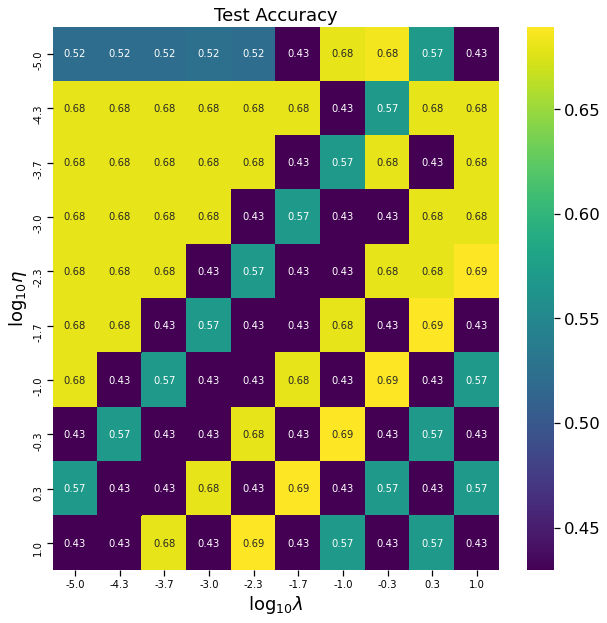

In [1458]:
fig, ax = plt.subplots(figsize = (k, k))
sns.heatmap(acc, annot=True, ax=ax, cmap="viridis")
ax.set_yticklabels([fr'{np.log10(eta):.1f}' for eta in etas], fontsize=10)
ax.set_xticklabels([fr'{np.log10(lmd):.1f}' for lmd in lambdas], fontsize=10)
ax.set_title("Test Accuracy")
ax.set_ylabel("log$_{10}\eta$")
ax.set_xlabel("log$_{10}\lambda$")
plt.show()

k = 10
acc = np.zeros((k,k))
etas = np.logspace(-7,0,k)
lambdas = np.logspace(-7,0,k)
for i, eta in enumerate(etas):
    for j, lmd in enumerate(lambdas):
        dnn = skl.neural_network.MLPClassifier(
            hidden_layer_sizes=(20), activation='logistic', alpha=lmd, learning_rate_init=eta, max_iter=1000)
        dnn.fit(X_train, y_train)
        acc[i,j] = dnn.score(X_test, y_test)

fig, ax = plt.subplots(figsize = (k, k))
sns.heatmap(acc, annot=True, ax=ax, cmap="viridis")
ax.set_yticklabels([fr'{np.log10(eta):.1f}' for eta in etas], fontsize=10)
ax.set_xticklabels([fr'{np.log10(lmd):.1f}' for lmd in lambdas], fontsize=10)
ax.set_title("Test Accuracy")
ax.set_ylabel("log$_{10}\eta$")
ax.set_xlabel("log$_{10}\lambda$")
plt.show()